Контекст
Этот набор данных генерируется с помощью Binance Api.

Что такое Binance Api?
Binance API - это метод, который позволяет подключаться к серверам Binance с помощью Python 
или нескольких других языков программирования. С его помощью вы можете автоматизировать свою торговлю.

Более конкретно, у Binance есть RESTful API, который использует HTTP-запросы для отправки и получения 
данных. Кроме того, также доступен WebSocket, который позволяет передавать потоковые данные, такие как 
котировки цен и обновления учетной записи.

Содержание
В этом наборе данных данные генерируются с интервалом в 1 минуту с помощью API. Он включает в себя
множество столбцов, показывающих реальное изменение цены Биткоина, а также показывает цену открытия, 
максимум, минимум и закрытия Биткоина в определенные минуты. Время открытия и закрытия в наборе данных 
указано в метке времени Unix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://www.kaggle.com/datasets/aakashverma8900/bitcoin-price-usd

In [8]:
raw_data = pd.read_csv(r"C:\Users\Varia\Documents\3_kurs\machine_learning\bitcoin.csv")

In [9]:
data = raw_data.rename(columns=
                    {'Open Time':'open_time','Open':'open','High':'high','Low':'low','Close':'close',
                    'Volume':'volume','Close Time':'close_time','Quote asset volume':'quote_asset_volume',
                    'Number of trades':'number_of_trades','Taker buy base asset volume':'taker_buy_base_asset_volume',
                    'Taker buy quote asset volume':'taker_buy_quote_asset_volume'})

In [10]:
data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888
...,...,...,...,...,...,...,...,...,...,...,...
188312,1620794100000,57517.42,57526.28,57485.00,57485.07,42.575735,1620794159999,2.448258e+06,1195,15.319691,880913.090845
188313,1620794160000,57485.07,57496.42,57466.75,57481.49,34.205467,1620794219999,1.966194e+06,1096,15.971891,918058.816162
188314,1620794220000,57477.18,57509.99,57458.18,57470.00,30.211789,1620794279999,1.736514e+06,955,13.054229,750364.577319
188315,1620794280000,57470.00,57470.01,57400.00,57450.90,45.354728,1620794339999,2.605080e+06,1559,12.615628,724559.233035


In [12]:
data.dtypes

open_time                         int64
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                        int64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
dtype: object

open_time: время открытия (временная метка Unix)

open: Цена открытия конкретной минуты

high: самая высокая цена конкретной минуты

low: самая низкая цена конкретной минуты

close: Цена закрытия конкретной минуты

volume: общий объем за определенную минуту.

close_time: время закрытия (временная метка Unix)

quote_asset_volume: объем котируемых активов

number_of_trades: количество сделок за определенную минуту

taker_buy_base_asset_volume: Объем базового актива, купленный Тейкером

taker_buy_quote_asset_volume: Объем активов, купленных Тейкером в цитируемой валюте


In [13]:
data.describe()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1.883170e+05,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,1.883170e+05,1.883170e+05,188317.000000,188317.000000,1.883170e+05
mean,1.615118e+12,48807.250870,48850.022846,48764.186791,48807.413975,57.316303,1.615118e+12,2.678839e+06,1533.133578,28.284067,1.321744e+06
std,3.271344e+09,9845.576682,9843.437596,9847.738664,9845.500077,60.822888,3.271344e+09,2.696383e+06,1090.227989,32.633285,1.452640e+06
min,1.609459e+12,28241.950000,28764.230000,28130.000000,28235.470000,0.000000,1.609459e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.612284e+12,38457.420000,38496.190000,38415.000000,38458.990000,25.978484,1.612284e+12,1.266419e+06,933.000000,12.143554,5.912582e+05
50%,1.615119e+12,51800.000000,51842.340000,51752.100000,51800.000000,39.890078,1.615119e+12,1.921741e+06,1261.000000,19.136216,9.214739e+05
75%,1.617944e+12,57054.250000,57092.630000,57014.750000,57054.310000,65.678755,1.617944e+12,3.089371e+06,1771.000000,32.191799,1.518327e+06
max,1.620794e+12,64800.000000,64854.000000,64685.170000,64800.000000,1866.939050,1.620794e+12,1.046984e+08,29164.000000,1179.493861,5.568395e+07


mean - среднее, std - стандартное отклонение

Для каждого атрибута построим гистограмму распределения значений, определим есть ли выбросы

<AxesSubplot:>

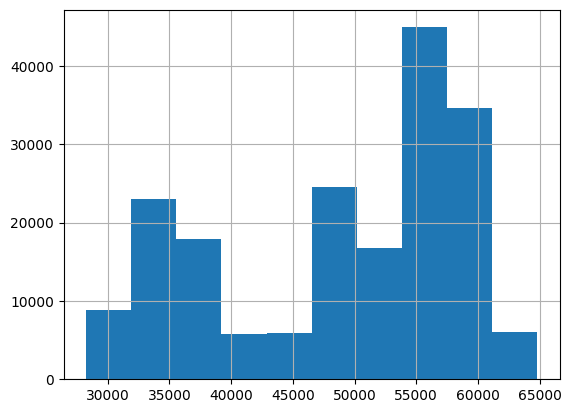

In [14]:
data.open.hist()

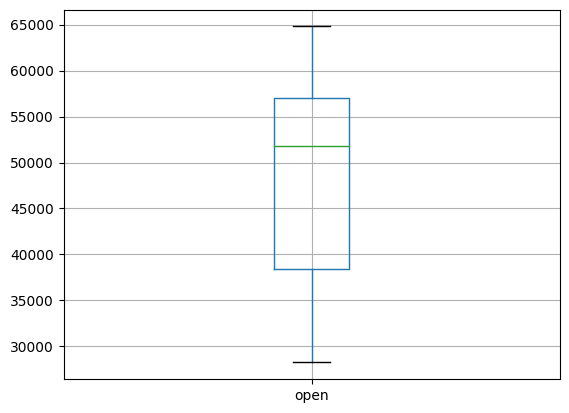

In [24]:
figure_open=data.boxplot(column='open')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='open', ylabel='Density'>

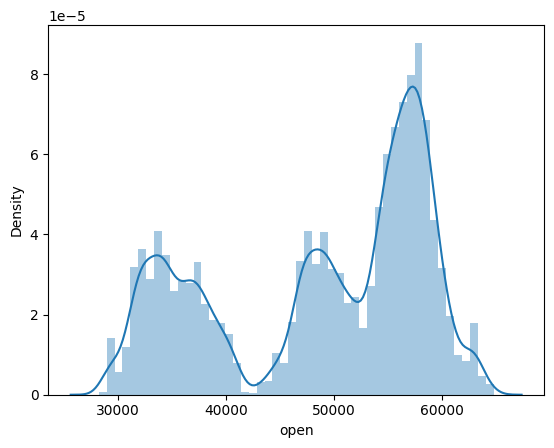

In [26]:
sns.distplot(data['open'].dropna())

In [27]:
lower_bound = data['open'].mean()-3*data['open'].std()
upper_bound = data['open'].mean()+3*data['open'].std()
print(lower_bound, upper_bound)

19270.520824908537 78343.98091545477


Таким образом, все значения меньшие, чем 19270.52 и большие, чем 78343.98 будут считаться выбросами.

<AxesSubplot:>

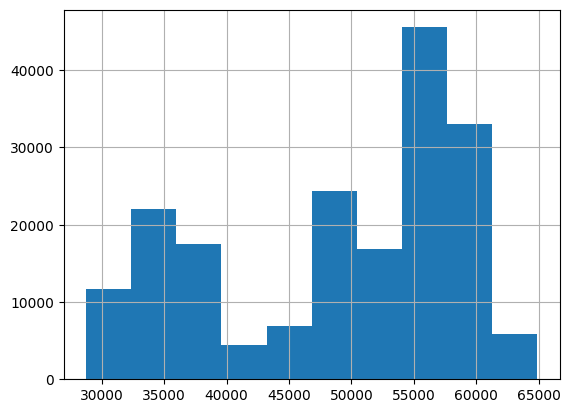

In [15]:
data.high.hist()

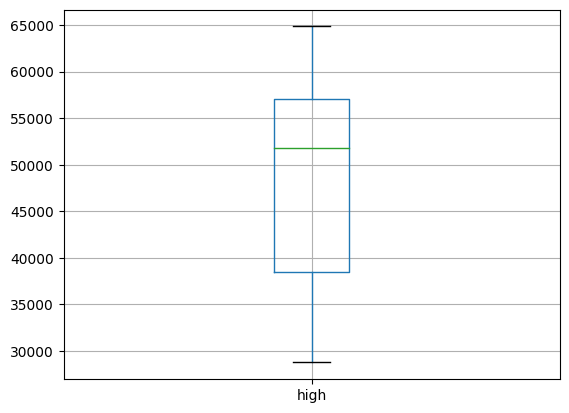

In [29]:
figure_high=data.boxplot(column='high')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='high', ylabel='Density'>

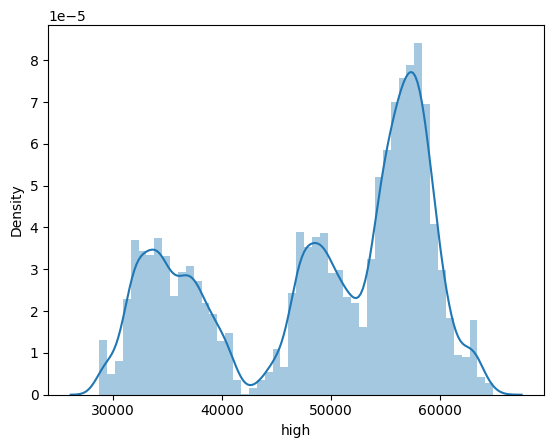

In [30]:
sns.distplot(data['high'].dropna())

In [31]:
lower_bound = data['high'].mean()-3*data['high'].std()
upper_bound = data['high'].mean()+3*data['high'].std()
print(lower_bound, upper_bound)

19319.710057582015 78380.33563441606


<AxesSubplot:>

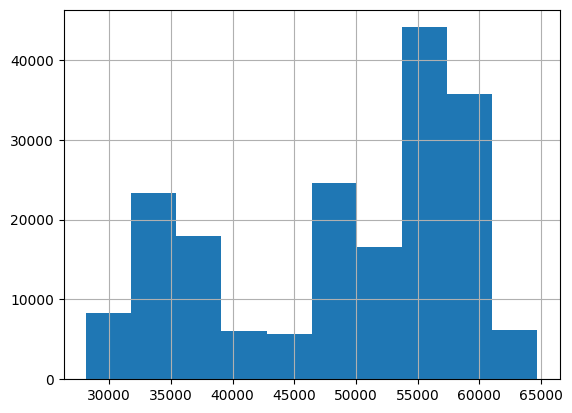

In [16]:
data.low.hist()

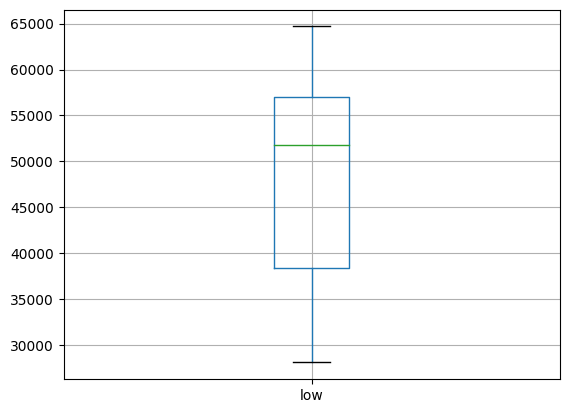

In [32]:
figure_low =data.boxplot(column='low')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='low', ylabel='Density'>

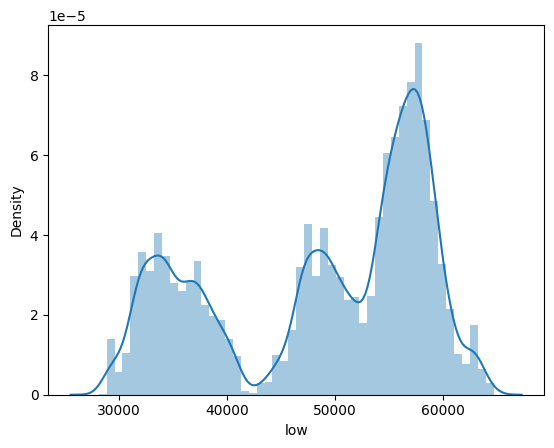

In [33]:
sns.distplot(data['low'].dropna())

In [35]:
lower_bound = data['low'].mean()-3*data['low'].std()
upper_bound = data['low'].mean()+3*data['low'].std()
print(lower_bound, upper_bound)

19220.970799480107 78307.40278208716


<AxesSubplot:>

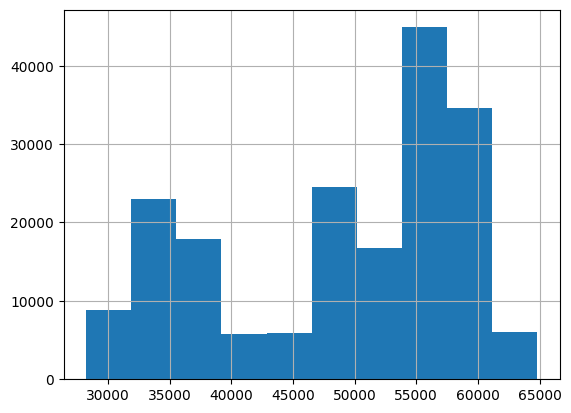

In [17]:
data.close.hist()

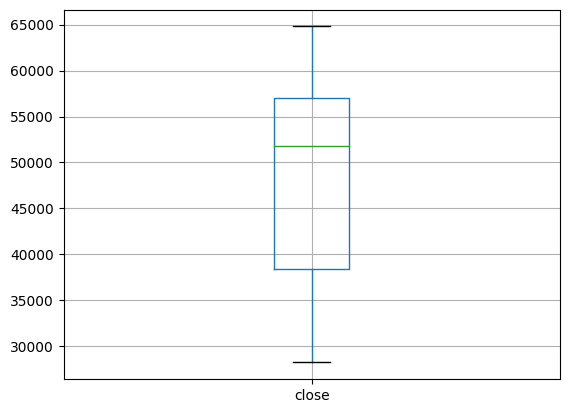

In [36]:
figure_close=data.boxplot(column='close')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='close', ylabel='Density'>

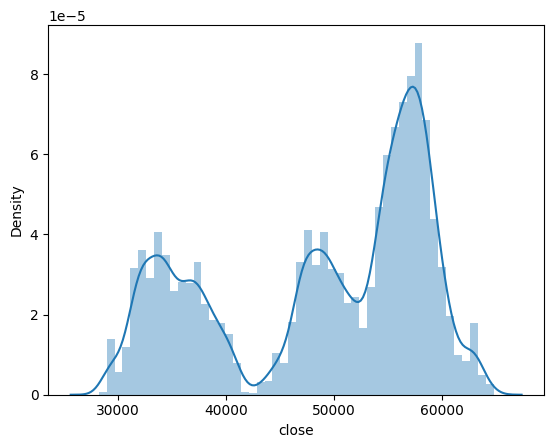

In [37]:
sns.distplot(data['close'].dropna())

In [38]:
lower_bound = data['close'].mean()-3*data['close'].std()
upper_bound = data['close'].mean()+3*data['close'].std()
print(lower_bound, upper_bound)

19270.913742800294 78343.91420719889


<AxesSubplot:>

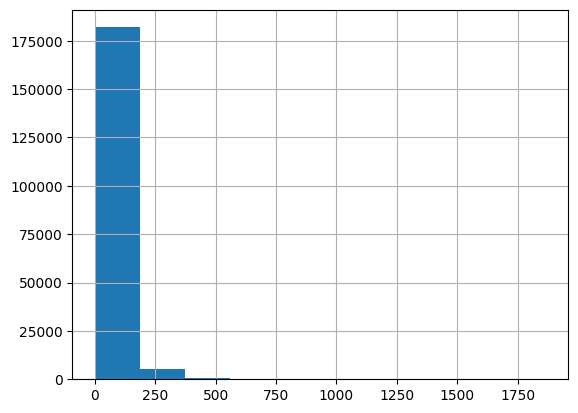

In [18]:
data.volume.hist()

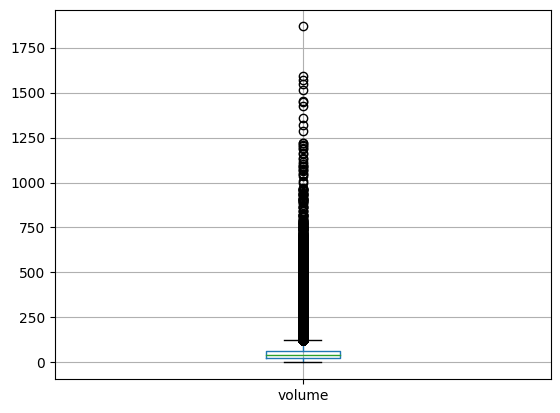

In [39]:
figure_volume = data.boxplot(column='volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='volume', ylabel='Density'>

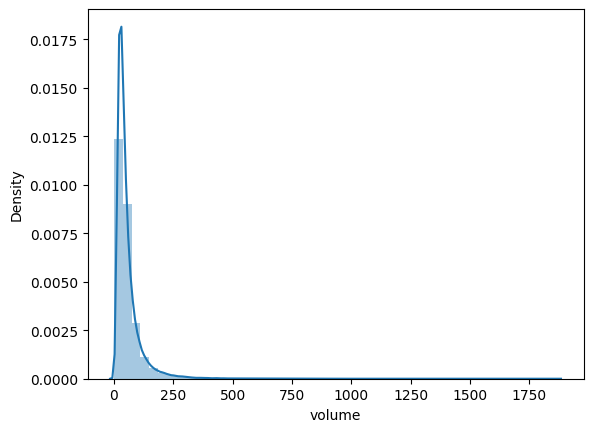

In [40]:
sns.distplot(data['volume'].dropna())

In [41]:
lower_bound = data['volume'].mean()-3*data['volume'].std()
upper_bound = data['volume'].mean()+3*data['volume'].std()
print(lower_bound, upper_bound)

-125.15236004845468 239.78496656069734


<AxesSubplot:>

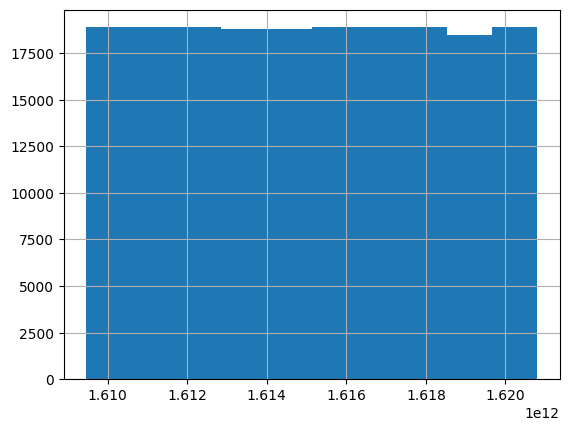

In [19]:
data.close_time.hist()

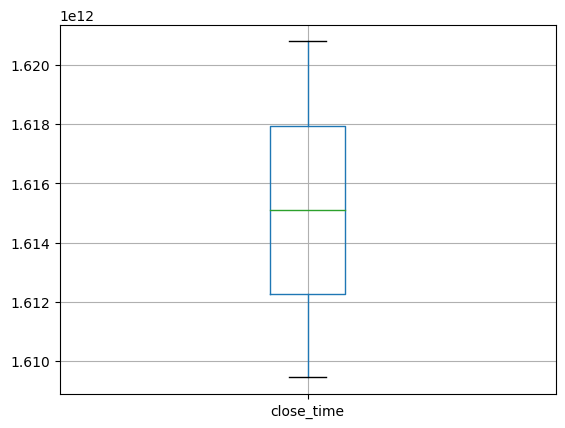

In [42]:
figure_close_time = data.boxplot(column='close_time')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='close_time', ylabel='Density'>

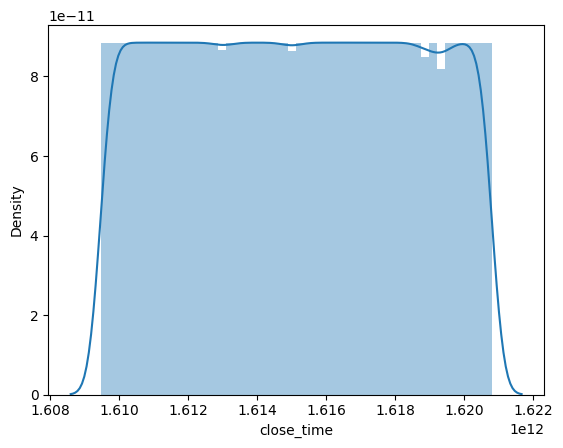

In [47]:
sns.distplot(data['close_time'].dropna())

In [48]:
lower_bound = data['close_time'].mean()-3*data['close_time'].std()
upper_bound = data['close_time'].mean()+3*data['close_time'].std()
print(lower_bound, upper_bound)

1605304407347.2065 1624932469415.1108


<AxesSubplot:>

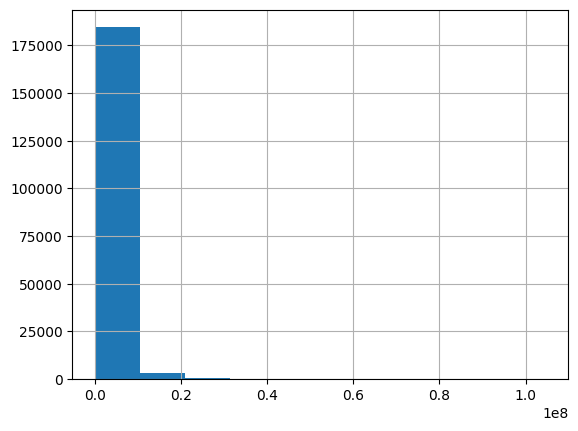

In [20]:
data.quote_asset_volume.hist()

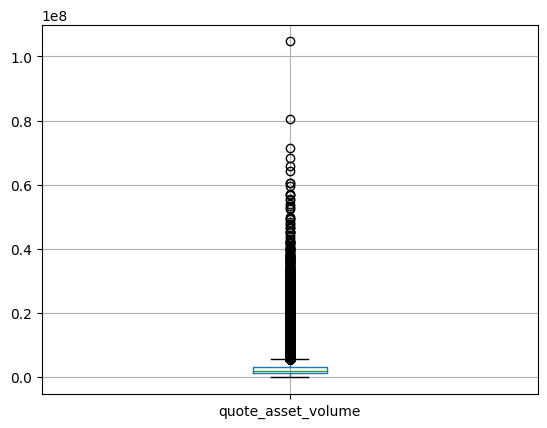

In [49]:
figure_quote_asset_volume = data.boxplot(column='quote_asset_volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='quote_asset_volume', ylabel='Density'>

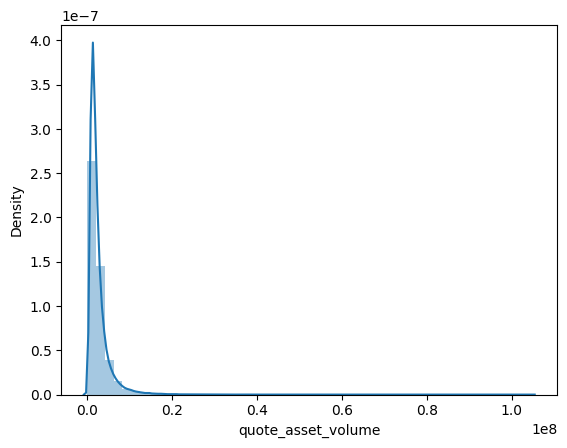

In [50]:
sns.distplot(data['quote_asset_volume'].dropna())

In [51]:
lower_bound = data['quote_asset_volume'].mean()-3*data['quote_asset_volume'].std()
upper_bound = data['quote_asset_volume'].mean()+3*data['quote_asset_volume'].std()
print(lower_bound, upper_bound)

-5410309.868151881 10767987.833650252


<AxesSubplot:>

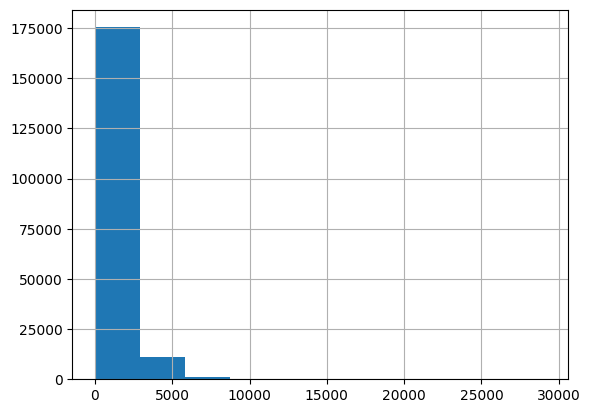

In [21]:
data.number_of_trades.hist()

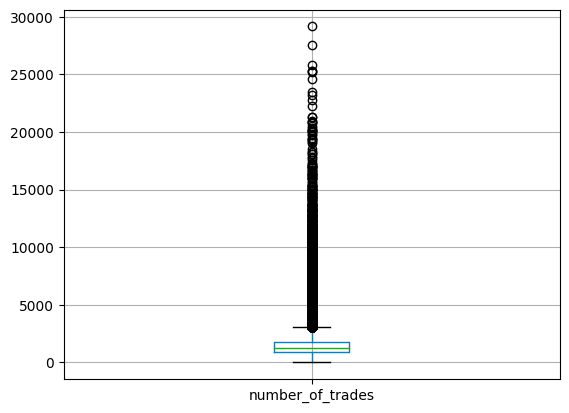

In [52]:
figure_number_of_trades = data.boxplot(column='number_of_trades')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='number_of_trades', ylabel='Density'>

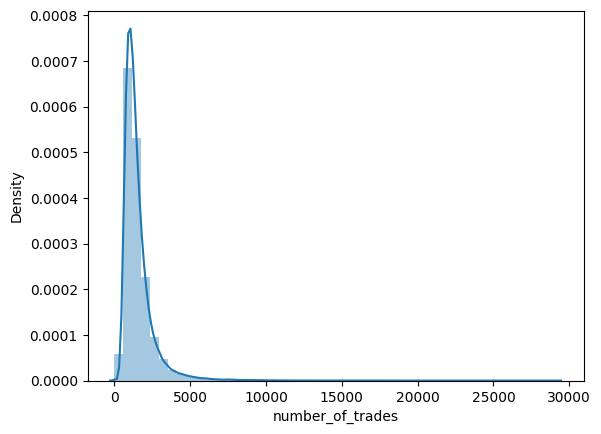

In [53]:
sns.distplot(data['number_of_trades'].dropna())

In [54]:
lower_bound = data['number_of_trades'].mean()-3*data['number_of_trades'].std()
upper_bound = data['number_of_trades'].mean()+3*data['number_of_trades'].std()
print(lower_bound, upper_bound)

-1737.5503900924737 4803.81754600511


<AxesSubplot:>

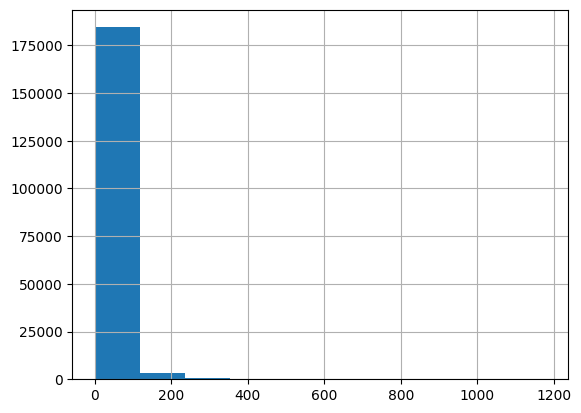

In [22]:
data.taker_buy_base_asset_volume.hist()

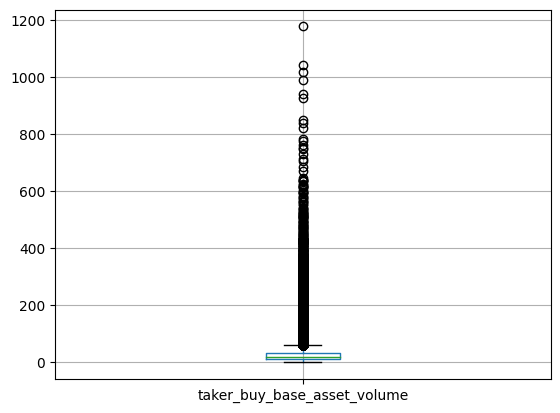

In [55]:
figure_taker_buy_base_asset_volume = data.boxplot(column='taker_buy_base_asset_volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='taker_buy_base_asset_volume', ylabel='Density'>

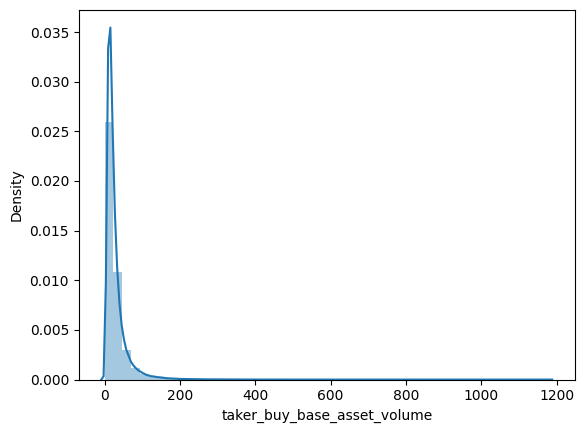

In [56]:
sns.distplot(data['taker_buy_base_asset_volume'].dropna())

In [57]:
lower_bound = data['taker_buy_base_asset_volume'].mean()-3*data['taker_buy_base_asset_volume'].std()
upper_bound = data['taker_buy_base_asset_volume'].mean()+3*data['taker_buy_base_asset_volume'].std()
print(lower_bound, upper_bound)

-69.61578866649819 126.18392313774615


<AxesSubplot:>

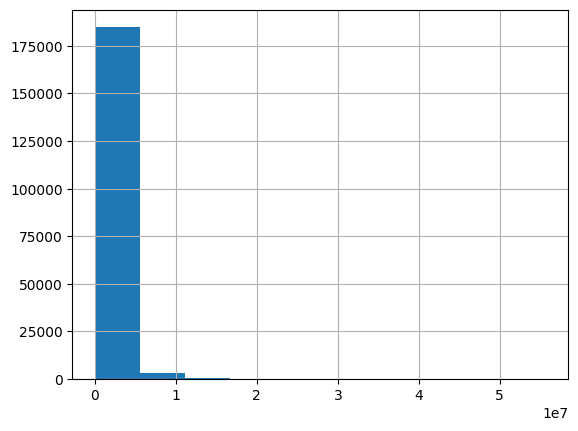

In [23]:
data.taker_buy_quote_asset_volume.hist()

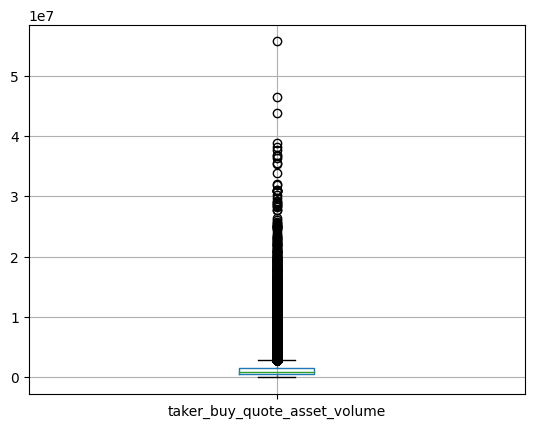

In [58]:
figure_taker_buy_quote_asset_volume = data.boxplot(column='taker_buy_quote_asset_volume')

C:\Users\Varia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='taker_buy_quote_asset_volume', ylabel='Density'>

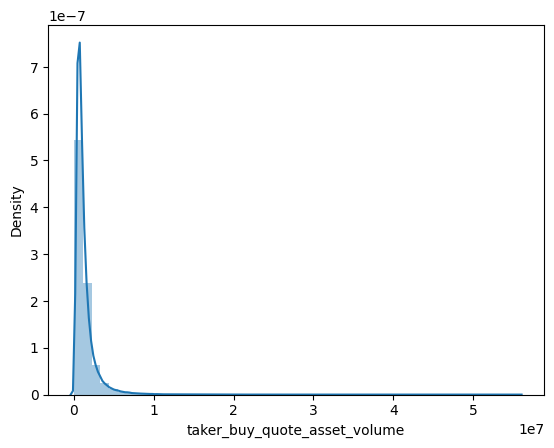

In [59]:
sns.distplot(data['taker_buy_quote_asset_volume'].dropna())

In [60]:
lower_bound = data['taker_buy_quote_asset_volume'].mean()-3*data['taker_buy_quote_asset_volume'].std()
upper_bound = data['taker_buy_quote_asset_volume'].mean()+3*data['taker_buy_quote_asset_volume'].std()
print(lower_bound, upper_bound)

-3036176.255871072 5679663.537420252
